In [13]:
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt
from tqdm import tqdm

# computed first 20 from 556 hex tsdata
# tsdata saved in ../data/time_series_data/
# images saved in ../results/newtsdata/


#hex_ids = ['8a1f1a8d9d97fff',
#           '8a1f1a8cb4cffff',
#           '8a1f1a8cb4dffff',
#           '8a1f1a8cb71ffff',
#           '881f1a8cb7fffff',
#           '881f1a164bfffff',
#           '881f1a8cbdfffff'
#           ]

#hex_id = hex_ids[6]

days=1460 # (4 years = 1460 days)
year=2018 # start of time series data

data_columns = ['idle_time','bike_count']

In [14]:
hex_ids = pd.read_csv('../data/final_df_points_18_21.csv').hex_id.unique()
hex_ids

array(['881f1a8d91fffff', '881f1a1659fffff', '881f1a8c83fffff',
       '881f1a160dfffff', '881f1a8ddbfffff', '881f1a1655fffff',
       '881f1a1657fffff', '881f1a8d93fffff', '881f1a1643fffff',
       '881f1a8d9dfffff', '881f1a8d9bfffff', '881f1ab965fffff',
       '881f1a164bfffff', '881f1a8ca3fffff', '881f1a8d99fffff',
       '881f1ab96dfffff', '881f1a164dfffff', '881f1a8cb3fffff',
       '881f1a1649fffff', '881f1a8cb1fffff', '881f1a8cabfffff',
       '881f1a1715fffff', '881f1ab961fffff', '881f1a8cb7fffff',
       '881f1a8ca5fffff', '881f1a8cb5fffff', '881f1aa113fffff',
       '881f1a8cb9fffff', '881f1a8da3fffff', '881f1a8cbdfffff',
       '881f1a85adfffff', '881f1a1647fffff', '881f1ab963fffff',
       '881f1a1609fffff', '881f1a16c5fffff', '881f1a165dfffff',
       '881f1ab947fffff', '881f1a16e9fffff', '881f1a1605fffff',
       '881f1a165bfffff', '881f1a8c95fffff', '881f1abb69fffff',
       '881f1a8dd3fffff', '881f1a1653fffff', '881f1a8c27fffff',
       '881f1a8c9dfffff', '881f1a8d8dfff

In [15]:
df = pd.read_csv('../data/final_df_points_18_21.csv')
df['time_start'] = pd.to_datetime(df['dt_start'],unit='s')
df

,bike_id,lat,lng,dt_start,dt_end,hex_id,in_zone,zone_name,end_station_number,temp,...,wind_speed,humidity,year,month,day,start_min,over_night,idle_time_next_day,idle_time,time_start
0,3694,51.323619,12.335887,1514764029,1514764799,881f1a8d91fffff,1,Pinke Zone Leipzig West 1€,4094,10.80,...,7.20,76.0,2017,12,6,1427,1,821,12,2017-12-31 23:47:09
1,2508,51.323619,12.335887,1514764035,1514764799,881f1a8d91fffff,1,Pinke Zone Leipzig West 1€,4094,10.80,...,7.20,76.0,2017,12,6,1427,1,1439,12,2017-12-31 23:47:15
2,41851,51.332415,12.395158,1514764638,1514764799,881f1a1659fffff,1,Pinke Zone Leipzig Ost 1€,0,10.80,...,7.20,76.0,2017,12,6,1437,1,1439,2,2017-12-31 23:57:18
3,3694,51.323619,12.335887,1514764800,1514814103,881f1a8d91fffff,1,Pinke Zone Leipzig West 1€,4094,10.86,...,9.30,76.0,2018,1,0,0,0,0,821,2018-01-01 00:00:00
4,2508,51.323619,12.335887,1514764800,1514851199,881f1a8d91fffff,1,Pinke Zone Leipzig West 1€,4094,10.86,...,9.30,76.0,2018,1,0,0,1,878,1439,2018-01-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2543825,72058,51.317569,12.382730,1640897593,1640904368,881f1a1609fffff,1,Blaue Zone Leipzig Ost 0€,0,13.19,...,8.94,83.0,2021,12,3,1253,0,0,112,2021-12-30 20:53:13
2543826,71949,51.334711,12.356763,1640897835,1640899343,881f1a1649fffff,1,Pinke Zone Leipzig Ost 1€,0,13.19,...,8.94,83.0,2021,12,3,1257,0,0,25,2021-12-30 20:57:15
2543827,97785,51.367276,12.369792,1640898086,1640900985,881f1a8c8bfffff,1,Blaue Zone Leipzig Ost 0€,0,13.05,...,8.05,84.0,2021,12,3,1261,0,0,48,2021-12-30 21:01:26
2543828,41738,51.366942,12.370322,1640900918,1640903516,881f1a8c8bfffff,1,Pinke Zone Leipzig Ost 1€,0,13.05,...,8.05,84.0,2021,12,3,1309,0,0,43,2021-12-30 21:48:38


In [16]:
# DEFINE TIME SERIES RANGE
# sets the data as index of time series (ts) data

rng = pd.date_range(f'{year}-01-01', periods=days, freq='D')
tsdata = pd.DataFrame({ 'date': rng, 'idle_time' : np.nan, 'list': np.nan, 'bike_count': np.nan})
tsdata = tsdata.set_index('date')
tsdata.head()

,idle_time,list,bike_count
date,,,
2018-01-01,NaN,NaN,NaN
2018-01-02,NaN,NaN,NaN
2018-01-03,NaN,NaN,NaN
2018-01-04,NaN,NaN,NaN
2018-01-05,NaN,NaN,NaN


In [17]:
# GET ALL RENTALS FORM HEX_ID
def get_all_rentals(hex_id):
    onedfhexid = pd.DataFrame(columns=df.columns)
    for ind in tqdm(df.index):
        if df['hex_id'][ind] == hex_id:
            onedfhexid.loc[df.index[ind]] = df.iloc[ind]
            #onedfhexid.append(df[ind], ignore_index = True)
    return onedfhexid.reset_index(drop=True)

In [18]:
def add_rows_to_days(onedfhexid):
    # ADD ROWS TO DAYS
    # compute idle time mean for one day over all rentals at that day

    # iteriere über alle Tage
    for date in tqdm(tsdata.index):
        list = []
        # Adde alle Rows in die List wenn Tag = Tag
        for ind in onedfhexid.index:
            if date.date() == onedfhexid['time_start'][ind].date():
                list.append(onedfhexid['idle_time'][ind])
        #print(len(list))
        # Setze Mittelwert für Tage
        if len(list) == 0:
            tsdata['bike_count'][date] = 1
            continue
        else:
            tsdata['bike_count'][date] = len(list)
            tsdata['idle_time'][date] = statistics.mean(list)
    return tsdata

In [19]:
# FILL MISSING DATA
def fill_missing_data(tsdata):
    tsdata = tsdata.asfreq('D')
    tsdata = tsdata.ffill()
    return tsdata

In [20]:
# TOTAL BIKE COUNT
def total_bike_count(tsdata):
    total_bike_count = int(tsdata['bike_count'].sum())
    return total_bike_count

In [21]:
# CREATE ROLLING WINDOW WITH MEAN
def roling_mean(tsdata):
    data_7d_rol = tsdata[data_columns].rolling(window = 7, center = True).mean()
    data_2m_rol = tsdata[data_columns].rolling(window = 60, center = True).mean()
    return data_7d_rol, data_2m_rol

In [22]:
# CREATE ROLLING WEIGHTED MEAN
def rolling_weightet_mean(tsdata):
    x = []
    rng2 = pd.date_range(f'{year}-01-01', periods=days, freq='D')
    data_7d_rol2 = pd.DataFrame({ 'date': rng2, 'idle_time' : np.nan})
    data_7d_rol2 = data_7d_rol2.set_index('date')

    for window in tsdata.rolling(window = 7 , center = True):
        #print(window)
        x.append(np.average(window['idle_time'], weights = window['bike_count']))
    data_7d_rol2['idle_time'] = x
    return data_7d_rol2

In [23]:
import pickle

def plot_details(tsdata,data_7d_rol,data_2m_rol,data_7d_mean2,hex_id,total_bike_count):

    fig, ax = plt.subplots(figsize = (30,10))

    # plotting daily data
    ax.plot(tsdata['idle_time'], marker='.', markersize=2, color='0.6',linestyle='None', label='Daily')
    # plotting 7-day rolling data
    ax.plot(data_7d_rol['idle_time'],color = 'blue', linewidth=2, label='7-d Rolling Mean')
    ax.plot(data_7d_mean2['idle_time'],color = 'green', linewidth=2, label='7-d Rolling Mean')
    # plotting 2-Month rolling data -trend-
    ax.plot(data_2m_rol['idle_time'], color='0.2', linewidth=3, label='Trend (2M)')
    ax.legend()
    ax.set_xlabel('time')
    ax.set_ylabel('idle_time (min)')
    ax.set_title(f'Trends in idel time of bikes in hex: {hex_id} with a total of {total_bike_count} rentals')

    ax2 = ax.twinx()
    ax2.plot(data_7d_rol['bike_count'],linewidth=1, color='0.5',label='Bike Count 7-d RM')
    ax2.set_xlabel('day')
    ax2.set_ylabel('bikes in hex per day')
    ax2.legend()

    ## SAVE

    #create a file
    picklefile = open(f'../data/time_series_data/tsdata_{hex_id}', 'wb')
    #pickle the dataframe
    pickle.dump(tsdata, picklefile)
    #close file
    picklefile.close()

    plt.savefig(f'../results/newtsdata/tsdata_{hex_id}.png', format='png')
    #plt.show()

100%|██████████| 1460/1460 [8:58:13<00:00, 22.12s/it]  


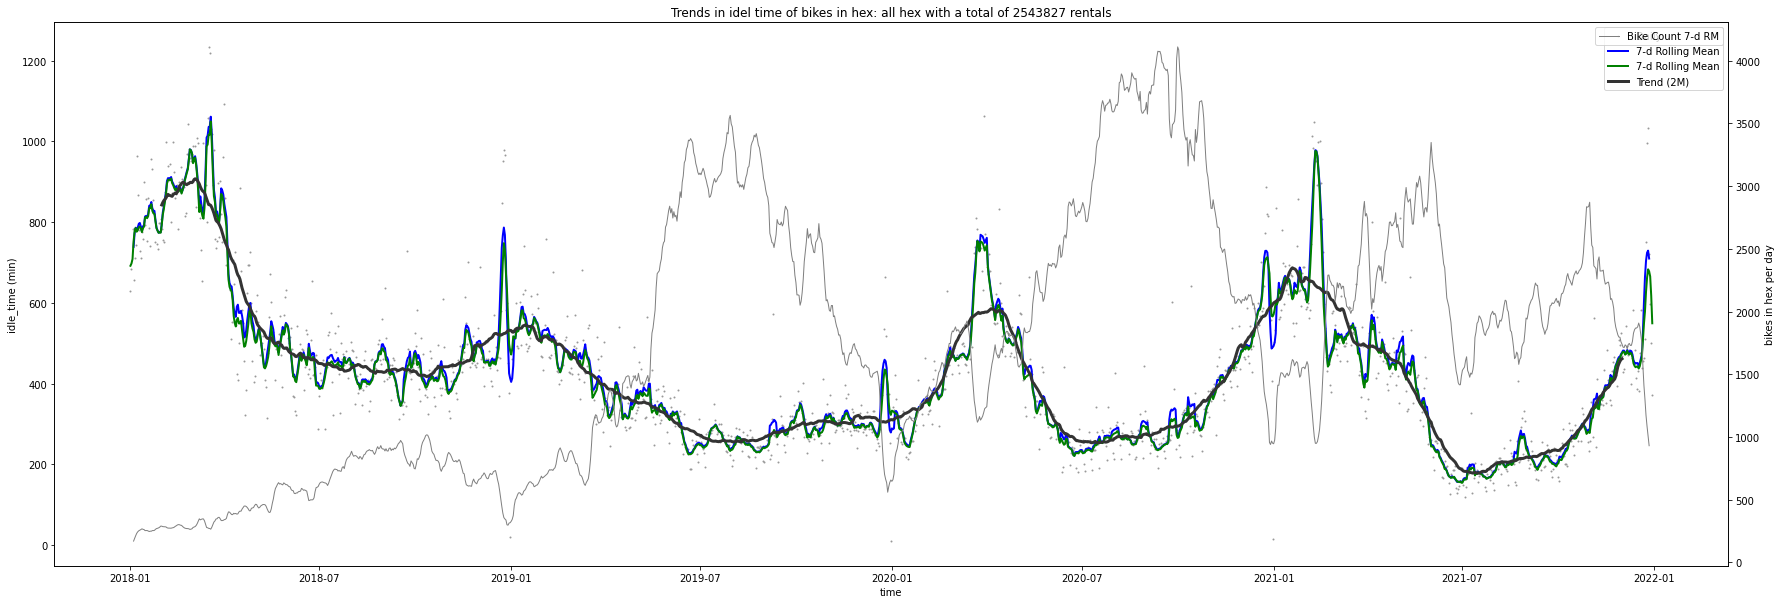

In [24]:
_hex_id = 'all hex'
_tsdata = add_rows_to_days(df)
_tsdata = fill_missing_data(_tsdata)
_tbc = total_bike_count(_tsdata)
_data_7d_rol, _data_2m_rol = roling_mean(_tsdata)
_data_7d_rol2 = rolling_weightet_mean(_tsdata)
plot_details(_tsdata,_data_7d_rol,_data_2m_rol,_data_7d_rol2,_hex_id,_tbc)

i = 0
total = len(hex_ids)

for _hex_id in hex_ids:
    _onedfhexid = get_all_rentals(_hex_id)
    _tsdata = add_rows_to_days(_onedfhexid)
    _tsdata = fill_missing_data(_tsdata)

    _tbc = total_bike_count(_tsdata)

    _data_7d_rol, _data_2m_rol = roling_mean(_tsdata)
    _data_7d_rol2 = rolling_weightet_mean(_tsdata)

    plot_details(_tsdata,_data_7d_rol,_data_2m_rol,_data_7d_rol2,_hex_id,_tbc)

    i+=1
    print(f'{i} from {total}', end='\r')